In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import warnings

warnings.filterwarnings("ignore")

In [2]:
import os
import sys

sys.path.append(os.path.abspath("../Scripts"))

In [3]:
df = pd.read_csv("../Data/Titanic-Dataset.csv")

In [4]:
from titanic import TitanicSurvivalPrediction
# Initialize the class
titanic_model = TitanicSurvivalPrediction(df)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Handle missing value

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

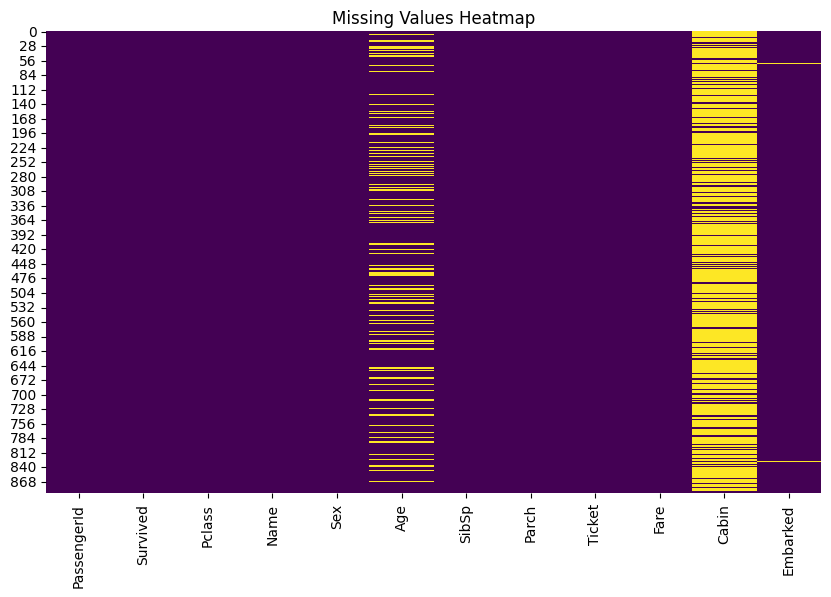

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### Target Variable Distribution

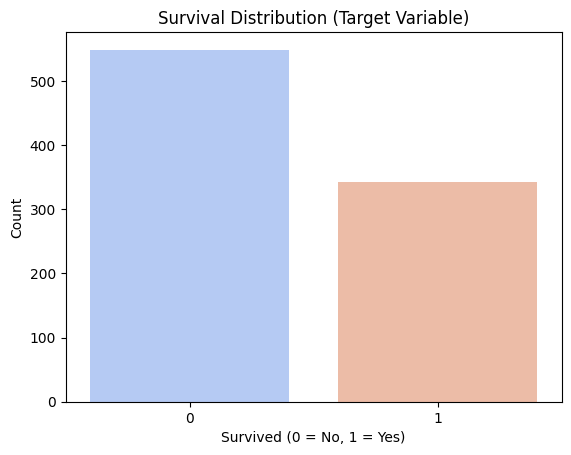

In [10]:
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Distribution (Target Variable)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [11]:
# Preprocess data
titanic_model.preprocess_data()

    # # Split the data
    # titanic_model.split_data()

    # # Train the model
    # titanic_model.train_model()

    # # Make predictions
    # y_pred, y_pred_prob = titanic_model.make_predictions()

    # # Evaluate the model
    # titanic_model.evaluate_model(y_pred, y_pred_prob)

    # # Display predictions
    # titanic_model.display_predictions(y_pred)

In [ ]:
# # Fill missing values in 'Age' with the median grouped by 'Pclass' and 'Sex'
# df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# # Fill missing values in 'Embarked' with the mode
# # df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# # # Correct way to fill missing values without using inplace
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# # Drop 'Cabin' column due to excessive missing values
# df.drop(['Cabin'], axis=1, inplace=True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

##### Passenger Class Distribution

In [38]:
Upper = 0
Middle = 0
Lower = 0
for i in range(891):
    if df['Pclass'][i] == 1:
        Upper += 1
    elif df['Pclass'][i] == 2:
        Middle += 1
    elif df['Pclass'][i] == 3:
        Lower += 1
print(f'Upper Class: {Upper}')
print(f'Middle Class: {Middle}')
print(f'Lower Class: {Lower}')

Upper Class: 216
Middle Class: 184
Lower Class: 491


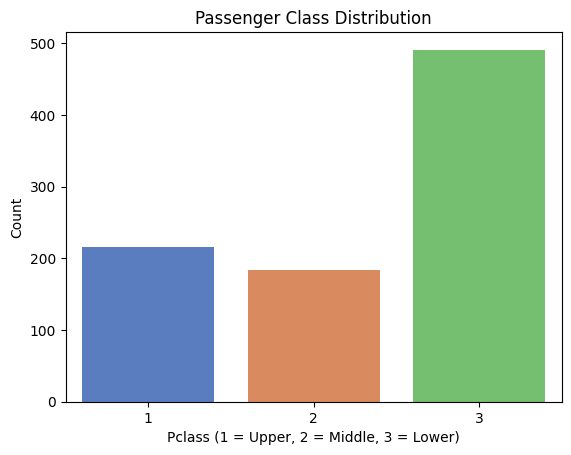

In [12]:
sns.countplot(x='Pclass', data=df, palette='muted')
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Count")
plt.show()

##### Age distribution

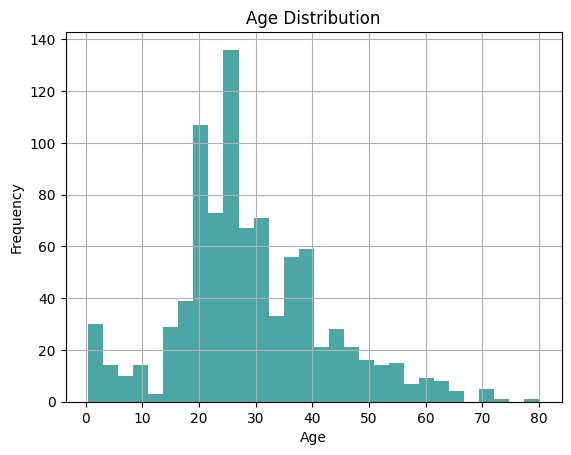

In [13]:
df['Age'].hist(bins=30, color='teal', alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

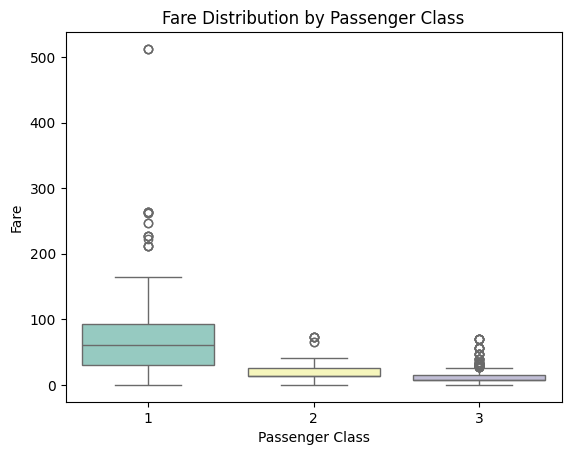

In [28]:
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

#### Bivariate Analysis

##### Survival Rate by Gender

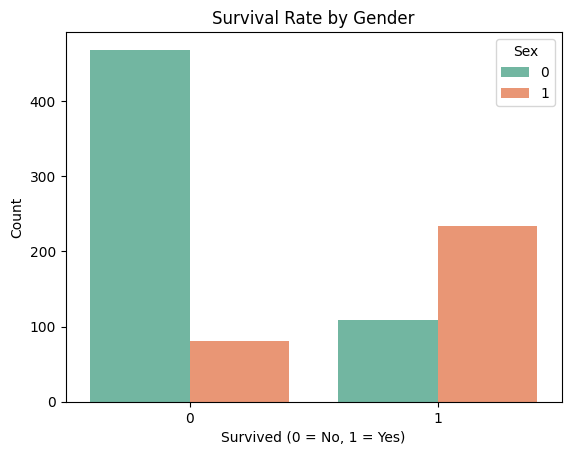

In [29]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title("Survival Rate by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### Survival Rate by Passenger Class

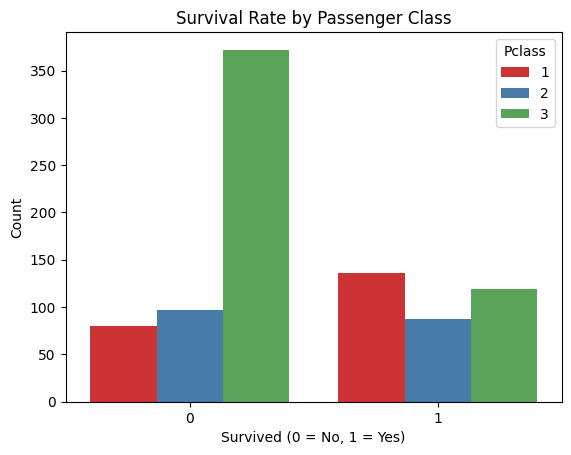

In [30]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set1')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### Age vs. Survival Scatterplot

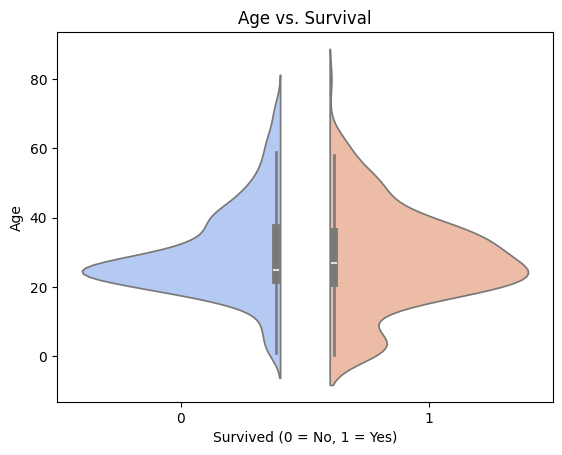

In [31]:
sns.violinplot(x='Survived', y='Age', data=df, palette='coolwarm', split=True)
plt.title("Age vs. Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

### Feature Engineering

In [18]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify the title categories
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona', 
                                        'Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Rare')

#####  Family Size Distribution

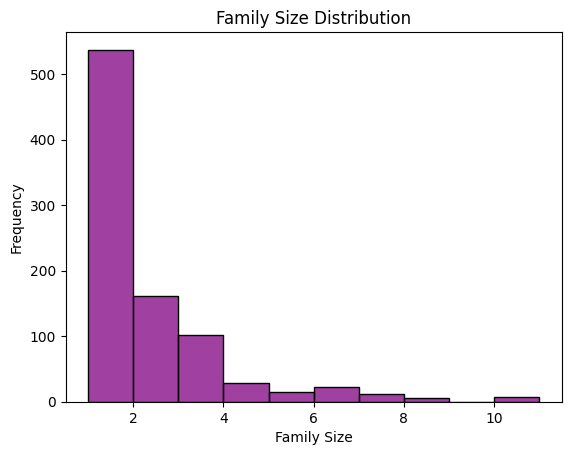

In [19]:
sns.histplot(df['FamilySize'], kde=False, bins=10, color='purple')
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Frequency")
plt.show()

##### Survival Rate by Family Size

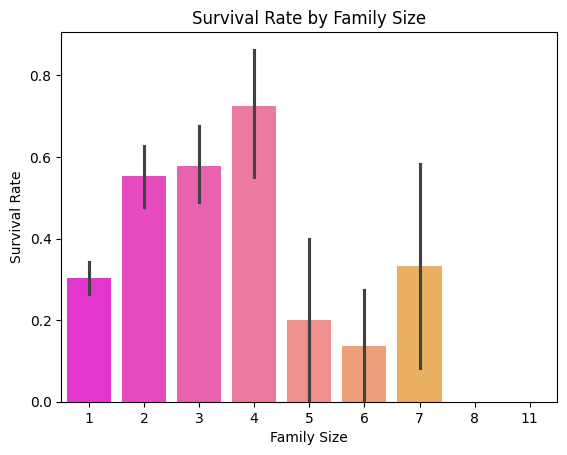

In [20]:
sns.barplot(x='FamilySize', y='Survived', data=df, palette='spring')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

#### Drop Unnecessary Columns

In [21]:
# Drop irrelevant columns
df.drop(['Name','Ticket','PassengerId'],axis = 1 , inplace=True)

#### Correlation Analysis

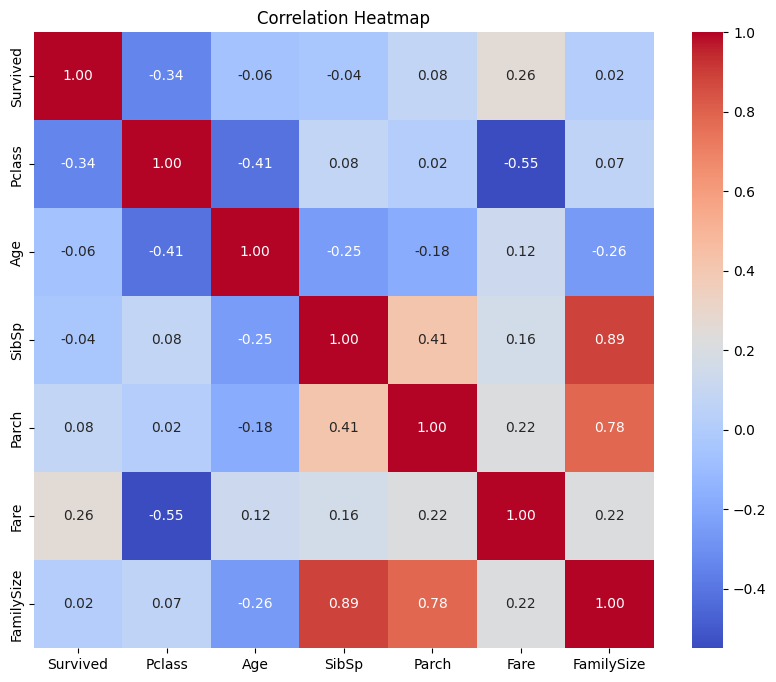

In [22]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlations and plot the heatmap
correlation_matrix = numerical_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### split Data into Features and Target

In [23]:

# Features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Preprocessing and Transformation

In [10]:
# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

#### Build the Model Pipeline

In [11]:
# Random Forest Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


#### Train the Model

In [26]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Title'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Evaluate the Model

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC-AUC Score: 0.831981981981982


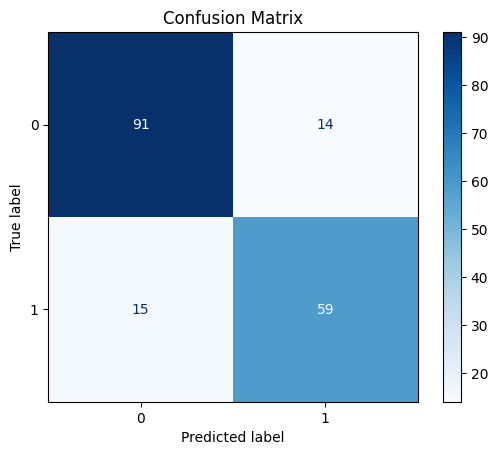

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

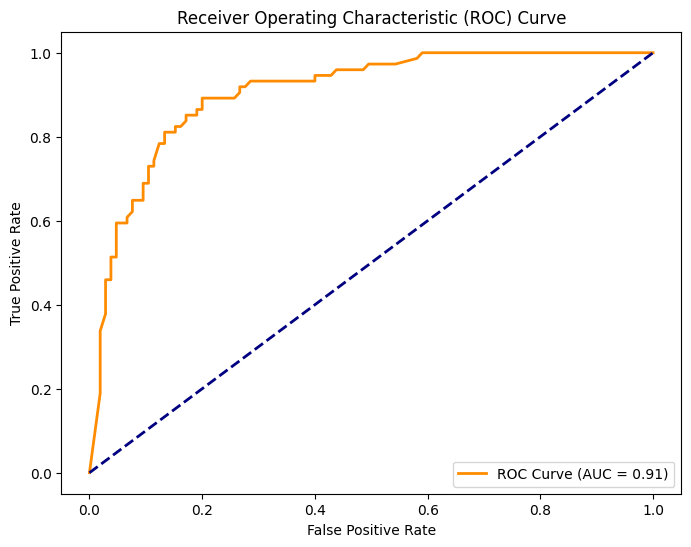

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#### Save the Model

In [33]:
import joblib

# Save the model to a file
joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']

In [30]:
# Display predictions
print("Sample Predictions on Test Data:")
print(y_pred[:10])

Sample Predictions on Test Data:
[1 0 0 1 0 1 1 0 1 1]


In [34]:
for i in range(len(y_pred)):
    print(f"X test: {X_test.iloc[i].to_dict()} | Predicted: {y_pred[i]}")

X test: {'Pclass': 3, 'Sex': 'male', 'Age': 25.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458, 'Embarked': 'C', 'FamilySize': 3, 'Title': 'Master'} | Predicted: 1
X test: {'Pclass': 2, 'Sex': 'male', 'Age': 31.0, 'SibSp': 0, 'Parch': 0, 'Fare': 10.5, 'Embarked': 'S', 'FamilySize': 1, 'Title': 'Mr'} | Predicted: 0
X test: {'Pclass': 3, 'Sex': 'male', 'Age': 20.0, 'SibSp': 0, 'Parch': 0, 'Fare': 7.925, 'Embarked': 'S', 'FamilySize': 1, 'Title': 'Mr'} | Predicted: 0
X test: {'Pclass': 2, 'Sex': 'female', 'Age': 6.0, 'SibSp': 0, 'Parch': 1, 'Fare': 33.0, 'Embarked': 'S', 'FamilySize': 2, 'Title': 'Miss'} | Predicted: 1
X test: {'Pclass': 3, 'Sex': 'female', 'Age': 14.0, 'SibSp': 1, 'Parch': 0, 'Fare': 11.2417, 'Embarked': 'C', 'FamilySize': 2, 'Title': 'Miss'} | Predicted: 0
X test: {'Pclass': 1, 'Sex': 'female', 'Age': 26.0, 'SibSp': 0, 'Parch': 0, 'Fare': 78.85, 'Embarked': 'S', 'FamilySize': 1, 'Title': 'Miss'} | Predicted: 1
X test: {'Pclass': 3, 'Sex': 'female', 'Age': 21.5, 'SibSp': 0, '

In [ ]:
# Initialize the class
    titanic_model = TitanicSurvivalPrediction(df)

    # Preprocess data
    titanic_model.preprocess_data()

    # Split the data
    titanic_model.split_data()

    # Train the model
    titanic_model.train_model()

    # Make predictions
    y_pred, y_pred_prob = titanic_model.make_predictions()

    # Evaluate the model
    titanic_model.evaluate_model(y_pred, y_pred_prob)

    # Display predictions
    titanic_model.display_predictions(y_pred)

In [1]:
import os
import sys

sys.path.append(os.path.abspath("../Scripts"))

In [2]:
from titanic import TitanicSurvivalPrediction

In [3]:
import pandas as pd

fff = pd.read_csv("../Data/Titanic-Dataset.csv")

In [4]:
titanic_model = TitanicSurvivalPrediction(fff)

In [8]:
# Preprocess data
titanic_model.preprocess_data()

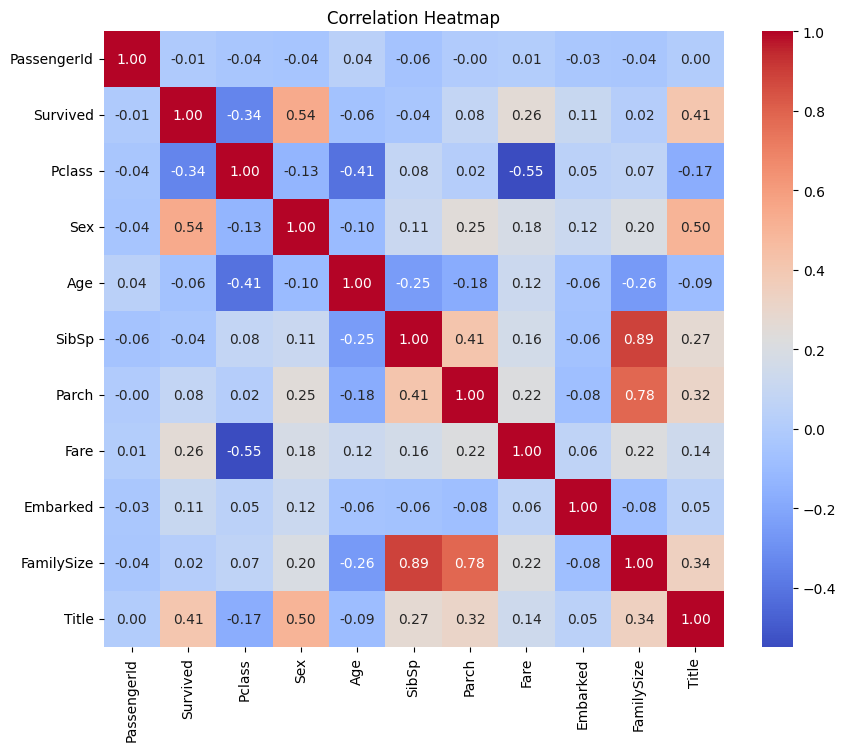

In [9]:
titanic_model.correlation()

In [10]:
# Split the data
titanic_model.split_data()

In [11]:
# Train the model
titanic_model.train_model()

In [12]:
# Make predictions
y_pred, y_pred_prob = titanic_model.make_predictions()

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



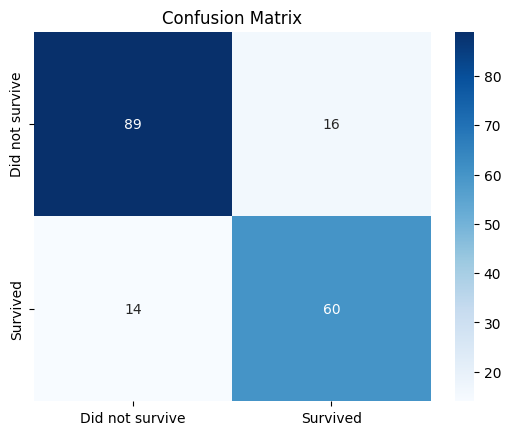

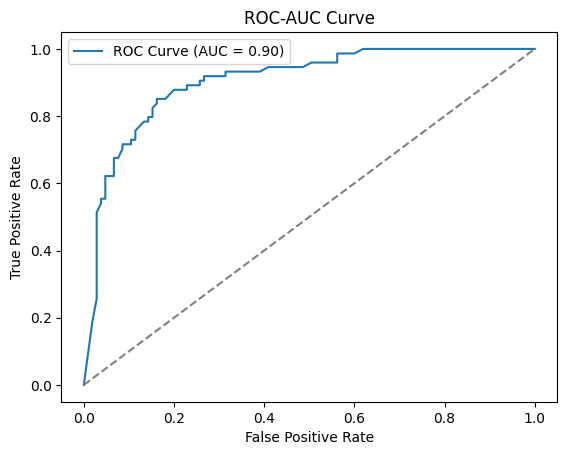

In [13]:
# Evaluate the model
titanic_model.evaluate_model(y_pred, y_pred_prob)

In [14]:
# Display predictions
titanic_model.display_predictions(y_pred)

X test: {'PassengerId': 710.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 25.0, 'SibSp': 1.0, 'Parch': 1.0, 'Fare': 15.2458, 'Embarked': 1.0, 'FamilySize': 3.0, 'Title': 3.0} | Predicted: 1
X test: {'PassengerId': 440.0, 'Pclass': 2.0, 'Sex': 0.0, 'Age': 31.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 10.5, 'Embarked': 0.0, 'FamilySize': 1.0, 'Title': 0.0} | Predicted: 0
X test: {'PassengerId': 841.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 20.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare': 7.925, 'Embarked': 0.0, 'FamilySize': 1.0, 'Title': 0.0} | Predicted: 0
X test: {'PassengerId': 721.0, 'Pclass': 2.0, 'Sex': 1.0, 'Age': 6.0, 'SibSp': 0.0, 'Parch': 1.0, 'Fare': 33.0, 'Embarked': 0.0, 'FamilySize': 2.0, 'Title': 1.0} | Predicted: 1
X test: {'PassengerId': 40.0, 'Pclass': 3.0, 'Sex': 1.0, 'Age': 14.0, 'SibSp': 1.0, 'Parch': 0.0, 'Fare': 11.2417, 'Embarked': 1.0, 'FamilySize': 2.0, 'Title': 1.0} | Predicted: 0
X test: {'PassengerId': 291.0, 'Pclass': 1.0, 'Sex': 1.0, 'Age': 26.0, 'SibSp': 0.0, 'Parch': 0.0, 'Fare'